In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline

In [42]:
df16 = pd.read_excel('Fires_100.xlsx', sheet_name='2016' , na_values=['<Null>'] , converters= {'ALARM_DATE': pd.to_datetime, 'CONT_DATE': pd.to_datetime})
df17 = pd.read_excel('Fires_100.xlsx', sheet_name='2017', na_values=['<Null>'], 
                   converters= {'ALARM_DATE': pd.to_datetime, 'CONT_DATE': pd.to_datetime})

df17.rename(columns={'YEAR_': 'YEAR'}, inplace=True)
print(df17.columns)
print(df16.columns)

Index(['YEAR', 'STATE', 'AGENCY', 'UNIT_ID', 'FIRE_NAME', 'INC_NUM',
       'ALARM_DATE', 'CONT_DATE', 'CAUSE', 'COMMENTS', 'REPORT_AC',
       'GIS_ACRES', 'C_METHOD', 'OBJECTIVE'],
      dtype='object')
Index(['YEAR', 'STATE', 'AGENCY', 'UNIT_ID', 'FIRE_NAME', 'INC_NUM',
       'ALARM_DATE', 'CONT_DATE', 'CAUSE', 'COMMENTS', 'REPORT_AC',
       'GIS_ACRES', 'C_METHOD', 'OBJECTIVE'],
      dtype='object')


In [43]:
dffires = pd.concat((df16, df17), axis=0)
dffires['DURATION'] = (dffires['CONT_DATE'] - dffires['ALARM_DATE']).dt.days
dffires = dffires[(dffires.DURATION >= 0) & (dffires.DURATION < 3000)]

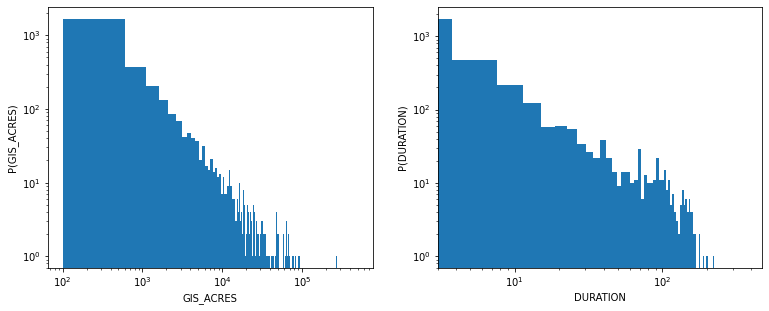

In [44]:
plt.figure(figsize=[12.8,4.8])
plt.subplot(1,2,1)
plt.hist(dffires.GIS_ACRES, bins=1000)
plt.loglog()
plt.xlabel('GIS_ACRES'); plt.ylabel('P(GIS_ACRES)')
plt.subplot(1,2,2)
plt.hist(dffires.DURATION, bins=100)
plt.loglog()
plt.xlabel('DURATION'); plt.ylabel('P(DURATION)')
plt.show()

# Relation between duration and the land area burnt

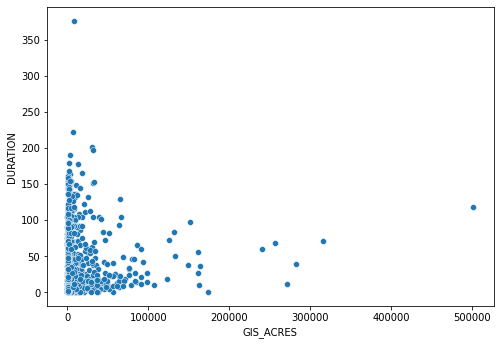

In [45]:
sns.scatterplot(data=dffires , x=dffires.GIS_ACRES, y=dffires.DURATION)
plt.rcParams["figure.figsize"] = (8,5.5)
plt.show()

## Not much correlation between duration and size
**We might expect some sort of correlation between duration and size, i.e., that bigger fires should probably tend to last longer. There does not appear to be much correlation in this historical data, however. Replotting the data, but coloring for which AGENCY is responsible for dealing with the fire, does suggest that some of this lack of correlation may be due to different management practices or suppression policies used by different agencies.**

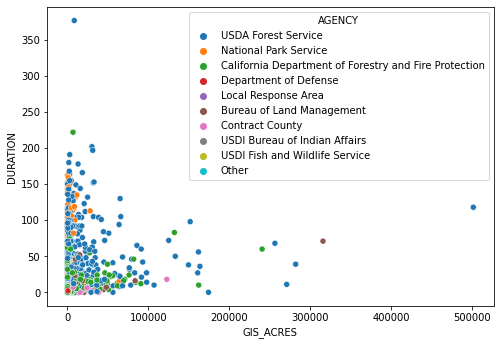

In [50]:
sns.scatterplot(data=dffires, x='GIS_ACRES', y='DURATION', hue='AGENCY')
plt.rcParams["figure.figsize"] = (8,5.5)
plt.show()

**Some points regarding Fire Management**
- Fires with larger areas are mostly handled by USDA Forest Service.
- CDFFP has been more effective in suppresing fires than other agencies. The fires handled by this agency lasted less than 3 months.

# Are the fires getting severe ?

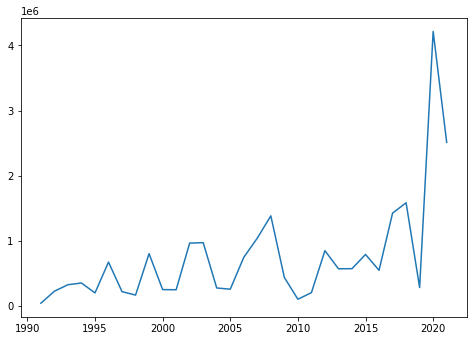

In [75]:

burn_data = pd.read_excel('california.xlsx' , header=1)
# burn_data.rename(columns={'YEAR_': 'YEAR'}, inplace=True)

plt.rcParams["figure.figsize"] = (8,5.5)
temp = burn_data[burn_data['YEAR_'] > 1990]

years = temp['YEAR_'].unique()
# print(years)
acres_burnt = []
for year in years:
    acres_burnt.append(sum(temp[temp['YEAR_'] == year].GIS_ACRES))

temp = []
for i in range(len(years)):
    temp.append([years[i] , acres_burnt[i]])
    
temp.sort()

for i in range(len(temp)):
    years[i] = temp[i][0]
    acres_burnt[i] = temp[i][1]
    
plt.plot(years , acres_burnt)

# for i in range(len(years)):
#     print(years[i] , acres_burnt[i])
# plt.plot(temp.YEAR, temp.GIS_ACRES)

# plt.plot(dffires.YEAR, dffires.GIS_ACRES)
# years = dffires.YEAR.unique()
# acre_burnt = []

# years.sort()
# for year in years :
#     acre_burnt.append(sum(dffires[dffires['YEAR'] == year].GIS_ACRES))

# for i in range(len(years)):
#     print(years[i] , acre_burnt[i])

Land area affected by a forest fire can be an apt measurement of its severity. **As per the trends from 1990 to 2020** the fires seem to destroy larger areas. These fires are getting worse with the span of time destroying larger areas.

# Causes of Forest Fires in California

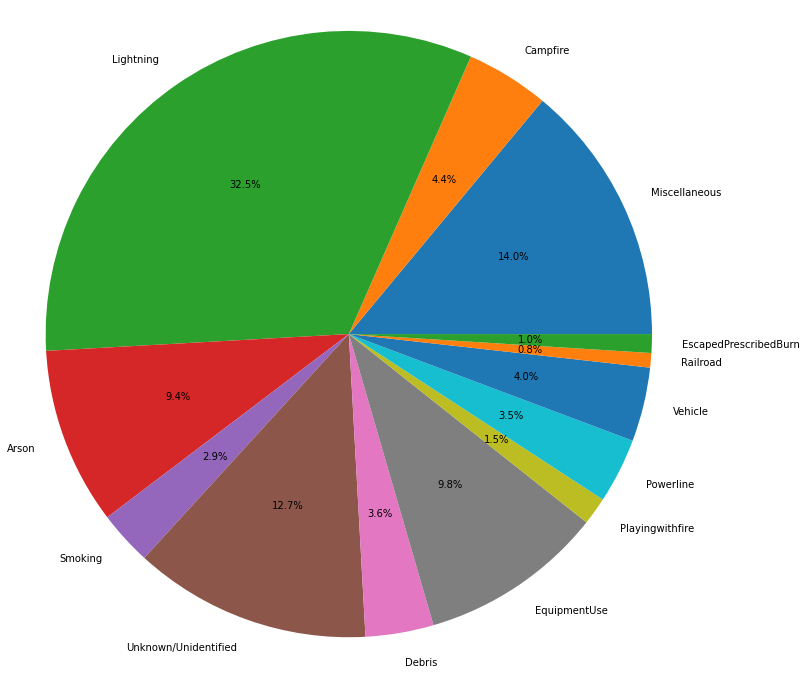

In [48]:
dffire = dffires[['YEAR' , 'CAUSE']].dropna()
# print(dffire)

# print(dffire['YEAR'].unique())
# # print(dffire['CAUSE'].unique())

causes = dffire['CAUSE'].unique()

causes_splitted = []
for i in range(len(causes)):
    x = causes[i]
    x = x.replace(' ', '')
    x = x.split('-')
    causes_splitted.append(x[1])

years = dffire['YEAR'].unique()

# causes = causes.strip('')
# print(causes)

data = []
cause_copy = []


for i in range(len(causes)):

    cause = causes[i]
    if(len(dffire[dffire['CAUSE'] == cause]) > 10):
        data.append(len(dffire[dffire['CAUSE'] == cause]))
        cause_copy.append(causes_splitted[i])

# for i in range(len(data)):
#     print(causes[i] , data[i])

fig = plt.figure(figsize = (12,12))
plt.pie(data , labels = cause_copy , autopct='%1.1f%%')
plt.axis('equal')

plt.show()

Anthropogenic activities causing forest fires in california are :
- Campfire
- Arson (Act of deliberately setting fire to property)
- Smoking
- Debris
- Equipment use
- Playing with fire
- Powerline causes
- Vehicles
- Railroad 
Other than anthropogenic factors **Lightening** caused 32.5% of fires from 1927 to 2018. 